# Installing Needed Tools

In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


## Tools

In [2]:
import numpy as np # for handling numbers
import pandas as pd # for handling spreadsheet data
import matplotlib.pyplot as plt # for plotting
import cv2 # computer vision from extracting features from images
import seaborn as sns # enchancement of plotting 
import math # uses for log operations to prevent underflow when calculating very small %'s
sns.set_style("darkgrid")

## Dataset
Load the spreadsheet for feature extraction with computer vision.

In [3]:
spreadsheet_data = pd.read_csv("birds.csv") # load the dataset
spreadsheet_data.head(10)

,class id,filepaths,labels,data set,scientific name
0,40.0,train/ASIAN GREEN BEE EATER/162.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
1,40.0,train/ASIAN GREEN BEE EATER/136.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
2,40.0,train/ASIAN GREEN BEE EATER/153.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
3,40.0,train/ASIAN GREEN BEE EATER/102.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
4,40.0,train/ASIAN GREEN BEE EATER/145.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
5,40.0,train/ASIAN GREEN BEE EATER/101.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
6,40.0,train/ASIAN GREEN BEE EATER/105.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
7,40.0,train/ASIAN GREEN BEE EATER/166.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
8,40.0,train/ASIAN GREEN BEE EATER/106.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
9,40.0,train/ASIAN GREEN BEE EATER/103.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS


# Computer Vision & Features
The spreadsheet does not directly contains the features, rather the filepaths for the images. Before we can train a model we need to use convert these images to usable data format in python. We'll also create a flipped instance of the an image to double the amount of data points available.

In [18]:

# Get a reduced size image's array of the pixel data into a dataframe to easily relate it to it's 'label'
def load_resize_flatten_images(df, target_size=(28, 28)):    
    # convert data format to feature vectors
    data = {'image':[],'label':[], 'class':[], 'class no':[]}
    for _, row in df.iterrows():
       
        # extractp pixel data from the image at the file path
        image = cv2.imread(row['filepaths'])
        # gray scale to reduce data size while retaining most data as colors well be stored as intenisity
        grayscaledImage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        # resize image to smaller dimensions make data more managable
        resizedImage = cv2.resize(grayscaledImage,target_size)
        # normalization of features
        resizedImage = resizedImage / 255
        # flipped image horizontally, to create more data points
        flippedImage = np.fliplr(resizedImage)
        # flatten into a 1D array
        imageArray = resizedImage.flatten()
        flippedArray = flippedImage.flatten()
        imgs = [imageArray,flippedArray]
        # create an entry for both flipped and non fliped versions of an image
        # this loop is also scalable if additional variants are done
        for ray in imgs:
            data['image'].append(ray)
            # use the filepath as an identifer to label the image data
            data['label'].append(row['filepaths'])
            # inded class from 0 to len(class) for confusion matrix and f1score methods from skitlearn later.
            match row['labels']:
                case 'ASIAN GREEN BEE EATER':
                    data['class no'].append(0)
                case 'D-ARNAUDS BARBET':
                    data['class no'].append(1)
                case 'HOUSE FINCH':
                    data['class no'].append(2)
                case 'OVENBIRD':
                    data['class no'].append(3)
                case 'RUFOUS TREPE':
                    data['class no'].append(4)
                    
            data['class'].append(row['labels'])
    # encapsulate this data as a dataframe for easier handling
    return pd.DataFrame(data)
pixelData = load_resize_flatten_images(spreadsheet_data)
pixelData.head(10)


<class 'pandas.core.series.Series'>


,image,label,class,class no
0,"[0.19607843137254902, 0.21176470588235294, 0.2...",train/ASIAN GREEN BEE EATER/162.jpg,ASIAN GREEN BEE EATER,0
1,"[0.28627450980392155, 0.2901960784313726, 0.28...",train/ASIAN GREEN BEE EATER/162.jpg,ASIAN GREEN BEE EATER,0
2,"[0.4666666666666667, 0.4470588235294118, 0.419...",train/ASIAN GREEN BEE EATER/136.jpg,ASIAN GREEN BEE EATER,0
3,"[0.41568627450980394, 0.42745098039215684, 0.4...",train/ASIAN GREEN BEE EATER/136.jpg,ASIAN GREEN BEE EATER,0
4,"[0.5647058823529412, 0.5647058823529412, 0.564...",train/ASIAN GREEN BEE EATER/153.jpg,ASIAN GREEN BEE EATER,0
5,"[0.5764705882352941, 0.5725490196078431, 0.572...",train/ASIAN GREEN BEE EATER/153.jpg,ASIAN GREEN BEE EATER,0
6,"[0.615686274509804, 0.615686274509804, 0.61568...",train/ASIAN GREEN BEE EATER/102.jpg,ASIAN GREEN BEE EATER,0
7,"[0.611764705882353, 0.611764705882353, 0.60784...",train/ASIAN GREEN BEE EATER/102.jpg,ASIAN GREEN BEE EATER,0
8,"[0.5607843137254902, 0.5568627450980392, 0.572...",train/ASIAN GREEN BEE EATER/145.jpg,ASIAN GREEN BEE EATER,0
9,"[0.6980392156862745, 0.7058823529411765, 0.717...",train/ASIAN GREEN BEE EATER/145.jpg,ASIAN GREEN BEE EATER,0


## Basic Exploratory Data Analysis (EDA)
A given pixels value is logically independent of another. Since the heat map in the example exists to prove inpendence it has been forgone.
Here's a histogram of all pxiels in the dataset.

Text(0.5, 1.0, 'Grayscale Pixel Values')

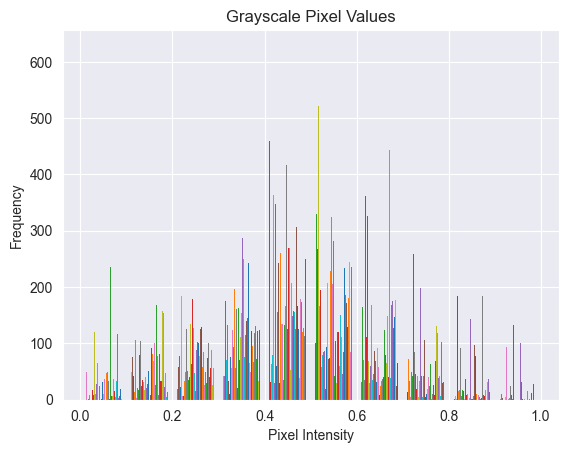

In [5]:
# Create a histogram with specified color
plt.hist(pixelData["image"], lw=0)

# Labeling x and y axes
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Title for the histogram
plt.title('Grayscale Pixel Values')

# EDA II, Data Distrubtion
Histrogram of all gray scale pixel data(like above) but broken down by class(bird species).

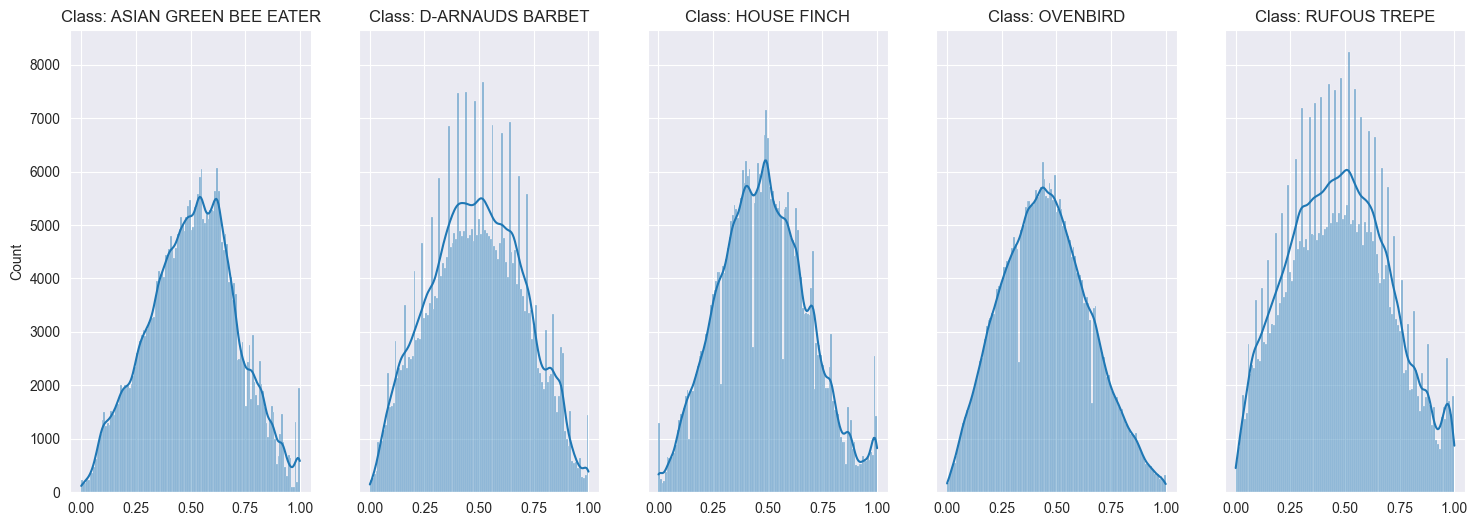

In [6]:
def EDA2(df):
    # show per label distrubtion
    classes = list(df['class'].unique())
    
    fig, axes = plt.subplots(1, len(classes), figsize=(18, 6), sharey=True)
    for i,clas in enumerate(classes):
        # get image data of the given class
        classData = df[df['class'] == clas]['image']
        # format the data for sns plotting
        flattened_data = np.concatenate(classData.values)
        # plot the data
        sns.histplot(flattened_data, ax=axes[i],  kde=True)
        axes[i].set_title(f'Class: {clas}')  # Set title for each subplot
EDA2(pixelData)


# Abstract Base Class For Neural Network

In [7]:
# Base class (abstract)
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

# Fully Connected Layer

In [8]:
# inherit from base class Layer
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        # random weights prevent dead nuerons instead of 0 weights.
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5


    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        # this is Z = feature vec + weight vec  but with an additional addition weight(known as a bias)
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    # dE/dW -> weight gradient, dE/dB -> bias gradient.
    # dE/dX -> dE/dY for previous layer 
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error.
        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

# Activation Layer
The one that finally gives us the Y.

In [9]:
# inherit from base class Layer
class ActivationLayer(Layer):
    # activation = activation function...
    # activation prime = derivative of activation function
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error,learning_rate):
        return self.activation_prime(self.input) * output_error
# specialized softmax layer taken from 12.2 practice tutorial with minor modifications
class SoftmaxLayer(Layer):
    def __init__(self, input_size):
        self.input_size = input_size
    # forward_propagation replaced with numerically stable forward propagation
    def forward_propagation(self, input):
        self.input = input
        temp = np.exp(input - np.max(input))
        self.output = temp / np.sum(temp)
        return self.output
    
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)

# Activation function + Derivative

In [10]:
# activaction function
def softmax(input):
        temp = np.exp(input - np.max(input))
        out = temp / np.sum(temp)
        return out
# standalone derivative of softmax(vectorized)
def softmax_prime(input): 
    s = input.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

# activation function 
def tanh(x):
    return np.tanh(x)
# and its derivative
def tanh_prime(x):
    return 1-np.tanh(x)**2

# Loss Fun + Derivative

In [11]:
# loss function and its derivative

# mse = mean square error loss function
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))
# derivative of mse
def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

# Network Class
To put it all together!

In [12]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss fun & d to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)
        
        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples      
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

# Loss functons and their primes

In [13]:
# mean squared error & derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size
# cat loss & derivative
def cat(y_true,y_pred):
    return -np.sum(y_true * np.log(y_pred + 10**-100))

def cat_prime(y_true,y_pred):
    return -y_true/(y_pred + 10**-100)

def relu(x):
    return np.maximum(x, 0)

def relu_prime(x):
    return np.array(x >= 0).astype('int')

# Final Pre-Processing & Data Splitting
Re-splits the data to have sufficen train and test data points.
Also changes labels to a 1-hot vector format better suited for later operations.

In [16]:
# use to split data ~70/30 between train and test data points.
from sklearn.model_selection import train_test_split
# using preprocessing form keras to make labels 1 hot vector
from keras.utils import to_categorical

X = pixelData['image'].tolist()
X = np.array(X)
Y = pixelData['class no'].values
# 33/66 % split with 1/3 going to test set, and the 2/3's going to train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)
# turn labels into 1 one hot vectors shape(# samples, 5)
y_train = to_categorical(y_train)
# not making y_test 1-shot so it works with sklearn api
#y_test = to_categorical(y_test)

#NOTE: features(x_train/x_test) are normalized in the first code block when loading into the data frame

<class 'numpy.ndarray'>


# Training and testing

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,f1_score

# network class that manages the neural network layers
net = Network()
# reshape for code compadability with network class fit function
# reshape from x samples, 784 to x samples, 1, 784
reshaped_x_train  = x_train.reshape(x_train.shape[0],1,x_train.shape[1])

# input shape 1,784, output 1,100
net.add(FCLayer(x_train.shape[1],100))
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(100, 50))
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(50, 5))
net.add(SoftmaxLayer(5))

net.use(cat,cat_prime)
# fitting the line to data
# these parameters were determine by repeated testing
net.fit(reshaped_x_train,y_train,epochs=250,learning_rate=0.01)

# raw softmax vectors, with probability per class of the given index 
raw_predictions = net.predict(x_test)
# extract classes from predictions
predictions = []
for ray in raw_predictions:
    predictions.append(np.argmax(ray))

# test and score the model
print(classification_report(y_test, predictions))
print('-'*55) # prints 55 dashes
print('Confusion Matrix\n')
print(confusion_matrix(y_test, predictions))
print(f1_score(y_test, predictions,average='micro'))
    

epoch 1/250   error=1.715211
epoch 2/250   error=1.605248
epoch 3/250   error=1.595468
epoch 4/250   error=1.582155
epoch 5/250   error=1.565959
epoch 6/250   error=1.546090
epoch 7/250   error=1.522504
epoch 8/250   error=1.494682
epoch 9/250   error=1.474169
epoch 10/250   error=1.449810
epoch 11/250   error=1.426540
epoch 12/250   error=1.400294
epoch 13/250   error=1.365353
epoch 14/250   error=1.344491
epoch 15/250   error=1.336694
epoch 16/250   error=1.315323
epoch 17/250   error=1.307222
epoch 18/250   error=1.250061
epoch 19/250   error=1.233072
epoch 20/250   error=1.233742
epoch 21/250   error=1.192209
epoch 22/250   error=1.210103
epoch 23/250   error=1.149896
epoch 24/250   error=1.161148
epoch 25/250   error=1.140448
epoch 26/250   error=1.110305
epoch 27/250   error=1.115619
epoch 28/250   error=1.097852
epoch 29/250   error=1.103355
epoch 30/250   error=1.067791
epoch 31/250   error=1.050924
epoch 32/250   error=1.037417
epoch 33/250   error=1.042408
epoch 34/250   erro